<a href="https://colab.research.google.com/github/AbhiRam36/decisiontree-536/blob/main/decisionTree1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
from math import*

In [230]:
import copy
from graphviz import Digraph

In [231]:
dataset='lymphography'
split_func='IG'

In [232]:
datasets={'weather':['https://raw.githubusercontent.com/AbhiRam36/decisiontree-536/main/eighthr.data.csv','0'],'dermatology':['https://raw.githubusercontent.com/AbhiRam36/decisiontree-536/main/dermatology.data.csv','2'],'echo':['https://raw.githubusercontent.com/AbhiRam36/decisiontree-536/main/echocardiogram.data.csv','71'],'lymphography':['https://raw.githubusercontent.com/AbhiRam36/decisiontree-536/main/lymph.csv','lymphatics'],'heart':['https://raw.githubusercontent.com/AbhiRam36/decisiontree-536/main/SPECTF.train.csv' ,'1']}

In [251]:
dataset_url,target_name=datasets[dataset]
data=pd.read_csv(dataset_url)
data=data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [234]:
print(data)

    lymphatics block_of_affere bl_of_lymph_c bl_of_lymph_s by_pass  \
0       arched             yes            no            no      no   
1    displaced             yes            no            no     yes   
2     deformed              no            no            no     yes   
3       arched              no            no            no      no   
4       arched              no            no            no      no   
..         ...             ...           ...           ...     ...   
143  displaced              no            no            no      no   
144   deformed              no            no            no      no   
145   deformed             yes            no            no     yes   
146   deformed             yes            no            no      no   
147     arched              no            no            no      no   

    extravasates regeneration_of early_uptake_in  lym_nodes_dimin  \
0             no              no             yes                1   
1            yes     

In [235]:
data

,lymphatics,block_of_affere,bl_of_lymph_c,bl_of_lymph_s,by_pass,extravasates,regeneration_of,early_uptake_in,lym_nodes_dimin,lym_nodes_enlar,changes_in_lym,defect_in_node,changes_in_node,changes_in_stru,special_forms,dislocation_of,exclusion_of_no,no_of_nodes_in,class
0,arched,yes,no,no,no,no,no,yes,1,4,round,lac_central,lacunar,stripped,vesicles,yes,yes,5,malign_lymph
1,displaced,yes,no,no,yes,yes,no,yes,1,3,round,lac_central,lacunar,diluted,vesicles,yes,yes,3,malign_lymph
2,deformed,no,no,no,yes,yes,yes,no,3,1,bean,lacunar,no,diluted,vesicles,no,no,7,fibrosis
3,arched,no,no,no,no,yes,no,yes,1,2,oval,lac_margin,lac_margin,drop_like,vesicles,no,yes,1,malign_lymph
4,arched,no,no,no,no,no,no,no,1,2,round,lac_margin,lac_margin,faint,vesicles,no,no,1,metastases
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,displaced,no,no,no,no,no,no,yes,1,3,round,lacunar,lacunar,coarse,chalices,yes,yes,2,metastases
144,deformed,no,no,no,no,yes,no,yes,1,4,round,lac_central,lacunar,coarse,vesicles,yes,yes,6,malign_lymph
145,deformed,yes,no,no,yes,yes,no,yes,1,2,oval,lac_central,lac_margin,diluted,chalices,yes,yes,4,malign_lymph
146,deformed,yes,no,no,no,no,no,yes,1,3,oval,lacunar,lac_central,faint,vesicles,yes,yes,3,malign_lymph


In [236]:
print(pd.DataFrame(data))
df=pd.DataFrame(data)
df.dtypes

    lymphatics block_of_affere bl_of_lymph_c bl_of_lymph_s by_pass  \
0       arched             yes            no            no      no   
1    displaced             yes            no            no     yes   
2     deformed              no            no            no     yes   
3       arched              no            no            no      no   
4       arched              no            no            no      no   
..         ...             ...           ...           ...     ...   
143  displaced              no            no            no      no   
144   deformed              no            no            no      no   
145   deformed             yes            no            no     yes   
146   deformed             yes            no            no      no   
147     arched              no            no            no      no   

    extravasates regeneration_of early_uptake_in  lym_nodes_dimin  \
0             no              no             yes                1   
1            yes     

lymphatics         object
block_of_affere    object
bl_of_lymph_c      object
bl_of_lymph_s      object
by_pass            object
extravasates       object
regeneration_of    object
early_uptake_in    object
lym_nodes_dimin     int64
lym_nodes_enlar     int64
changes_in_lym     object
defect_in_node     object
changes_in_node    object
changes_in_stru    object
special_forms      object
dislocation_of     object
exclusion_of_no    object
no_of_nodes_in      int64
class              object
dtype: object

In [237]:
print(df.count())
print(sum(df[target_name].value_counts().to_dict().values()))

lymphatics         148
block_of_affere    148
bl_of_lymph_c      148
bl_of_lymph_s      148
by_pass            148
extravasates       148
regeneration_of    148
early_uptake_in    148
lym_nodes_dimin    148
lym_nodes_enlar    148
changes_in_lym     148
defect_in_node     148
changes_in_node    148
changes_in_stru    148
special_forms      148
dislocation_of     148
exclusion_of_no    148
no_of_nodes_in     148
class              148
dtype: int64
148


In [238]:
import random
def train_test_split(df,test_size):
  df=df.sample(frac = 1)
  n=len(df)
  no_test_rows=int(n*test_size)
  l=list(random.sample(list(range(n)), no_test_rows))
  test=df.iloc[l]
  train=df.drop(l,axis=0)
  return train.sample(frac = 1),test.sample(frac = 1)
# test_df=data
df,test_df=train_test_split(df,0.3)
print(len(df),len(test_df))

104 44


In [239]:
class DecisionTree():
  
  ## Class Member Functions ##

  def entropy_help(p):
    return -p*log(p,2)
  
  def getEntropy(df,target_name):  
    n=df.count()[0]
    target_counts=df[target_name].value_counts().to_dict()
    s=0
    for p in target_counts.values():
      if p/n==1 or p/n==0:
        return 0
      s+=DecisionTree.entropy_help(p/n)
    # print(s)
    return s
  
  def getProbability(df,column,value):
    return df[df[column]==value].count()[0]/df.count()[0]
  
  def informationGain(df,target_name,col):
    # print("Entropy of ",col,DecisionTree.getEntropy(df,target_name))
    total_entropy=DecisionTree.getEntropy(df,target_name)
    col_vals_count=df[col].value_counts().to_dict()
    sum=0
    for value in col_vals_count:
      n=col_vals_count[value]
      # print("Entropy of ",col,value,DecisionTree.getEntropy(df[df[col]==value],target_name))
      sum+=(DecisionTree.getEntropy(df[df[col]==value],target_name)*DecisionTree.getProbability(df,col,value))
    # print("IG: ",target_name,col,total_entropy-sum)
    return total_entropy-sum

  ## Class Data Members ##

  split_functions={'IG':informationGain}
  
  ## Countructor ##
  def __init__(self,df,target_name,split_function="IG",level=-1,leaf_nodes=-1):
    self.tree=self.Tree()
    self.df=df
    self.target_name=target_name
    self.cols=list(self.df.columns)
    self.cols.remove(self.target_name)
    self.cnt=0
    self.gnodes=[]
    self.level=level
    self.leaf_nodes=leaf_nodes
    self.rules=[]
    self.output_classes=self.df[self.target_name].unique()
    if split_function in DecisionTree.split_functions:
      self.split_function=DecisionTree.split_functions[split_function]
    else:
      raise Exception("Split function not found")

  ## Instance Methods ##

  def getGraph(self):
    return self.tree.g

  def find_leaf(self,df):
    counts=df[self.target_name].value_counts().to_dict()
    return max(zip(counts.values(), counts.keys()))[1]
    
      # unique_vals=list(df[self.target_name].unique())
      # for val in unique_vals:      
      #   if df[df[self.target_name]==val].count()[0]==df.count()[0]:
      #     return val

  def construct(self):
    maxig=[-1,""]
    for i in self.cols:
      etemp=self.split_function(df,self.target_name,i)
      maxig=maxig if maxig[0]>etemp else [etemp,i]
    root=self.Node(maxig[1],maxig[0],0)
    self.tree.insert_root(root)
    c=copy.deepcopy(self.cols)
    c.remove(root.name)
    root.gname=str(root)
    self.gnodes.append(root)
    self.tree.g.node(str(root),str(root))
    self.construct_help(df,c,root)

  def construct_help(self,df,cols,parent):
    if not parent.name:
      return
    vals=list(df[parent.name].unique())
    dftemp=df

    for k in vals:
      if self.leaf_nodes!=-1 and self.tree.no_leafs>=self.leaf_nodes:
        return
      df=dftemp
      df=df[df[parent.name]==k]
      e=DecisionTree.getEntropy(df,self.target_name)

      if e==0 or parent.level==self.level-1:
        value=self.find_leaf(df)
        node=self.Node(value,1,parent.level+1)
        node.gname=str(value)
        parent.insert_child(node)
        parent.insert_edge(k)
        self.tree.no_leafs+=1
        name=value
        if not isinstance(value, str):
          name='class'
        self.tree.g.node(name+str(self.cnt),str(value))
        self.tree.g.edge(str(parent.gname),name+str(self.cnt),label=str(k))
        
        self.cnt+=1
        continue
      maxig=[-1,""]
      for i in cols:
        etemp=self.split_function(df,self.target_name,i)
        maxig=maxig if maxig[0]>etemp else [etemp,i]
      node=self.Node(maxig[1],maxig[0],parent.level+1)
      node.gname=str(node.name)
      c=copy.deepcopy(cols)
      if node.name in c:
        c.remove(node.name)
      name=str(node)

      # checking if node name already exist in graphviz code
      
      if name in self.gnodes:
        name+=str(self.cnt)
        self.cnt+=1
      else:
        self.gnodes.append(name)
      node.gname=name

      parent.insert_child(node)
      parent.insert_edge(k)

      self.tree.g.node(name,str(node))
      self.tree.g.edge(str(parent.gname),name,label=str(k))
      
      self.construct_help(df[df[parent.name]==k],c,node)
      
  def predict(self,instances,trace=False):
    node=self.tree.root
    op=[]
    if isinstance(instances,dict):
      return self.predict_help(node,instances,trace,"")
    if isinstance(instances,list):
      
      for instance in instances:
        op.append(self.predict_help(node,instance,trace,""))
    else:
      n=len(instances)
      for i in range(n):
        instance=data.iloc[i].to_dict()
        op.append(self.predict_help(node,instance,trace,""))
    return op

  def predict_help(self,node,instance,trace,path):
    if node.name in self.output_classes:
      if trace:
        print(path+str(node))
      return node.name
    value=instance[node.name]
    try:
      path+=str(node)+" ( "+str(value)+" ) -> "
      ind=node.edges.index(value)
      return self.predict_help(node.childs[ind],instance,trace,path)
    except Exception as e:
      return "Not valid instance, path: "+path
  def get_rules(self):
    node=self.tree.root
    self.rules_help(node,str(node.name)+" -> ")
    return self.rules

  def rules_help(self,node,path):
    for n,e in zip(node.childs,node.edges):
      if n.name in self.output_classes:
        self.rules.append("{} ( {} ) {}".format(path,str(e),str(n.name)))
      self.rules_help(n,"{} ( {} ) {} -> ".format(path,str(e),str(n.name)))
  
  ## Inner classes ##
  class Node:
    ## Countructor ##
    def __init__(self,name,ig,level):
      self.name=name
      self.ig=ig
      self.childs=[]
      self.edges=[]
      self.gname=''
      self.level=level

    ## Instance Methods ##

    def insert_child(self,node):
      self.childs.append(node)

    def insert_edge(self,edge):
      self.edges.append(edge)

    def printn(self,edge=""):
      # if self.childs:
      dashes="|"+"-"*(self.level*5)
      value="( "+str(edge)+") "+str(self.gname) if edge else str(self.gname)
      # print(" "*(self.level*2+1),''.join(['-']*31))
      # print(dashes,'|{:^15} - level - {:^2} | '.format(self.gname,self.level),list(zip(self.edges,list(map(lambda x:x.gname,self.childs)))))
      # print(" "*(self.level*2+1),''.join(['-']*31))
      print(dashes,value)

    def __str__(self):
      return str(self.name)

  class Tree:

    ## Countructor ##
    def __init__(self):
      self.root=None
      self.g=Digraph(encoding='utf-8')
      self.no_leafs=0

    ## Instance Methods ##

    def insert_root(self,node):
      self.root=node

    def printt(self):
      self.print_help(self.root,"")

    def print_help(self,node,edge):
      if node:
        node.printn(edge)
        # print("(",edge,")")
      for i in range(len(node.childs)):
        self.print_help(node.childs[i],node.edges[i])

In [240]:
d=DecisionTree(data,target_name,split_function=split_func)

In [241]:
d.construct()

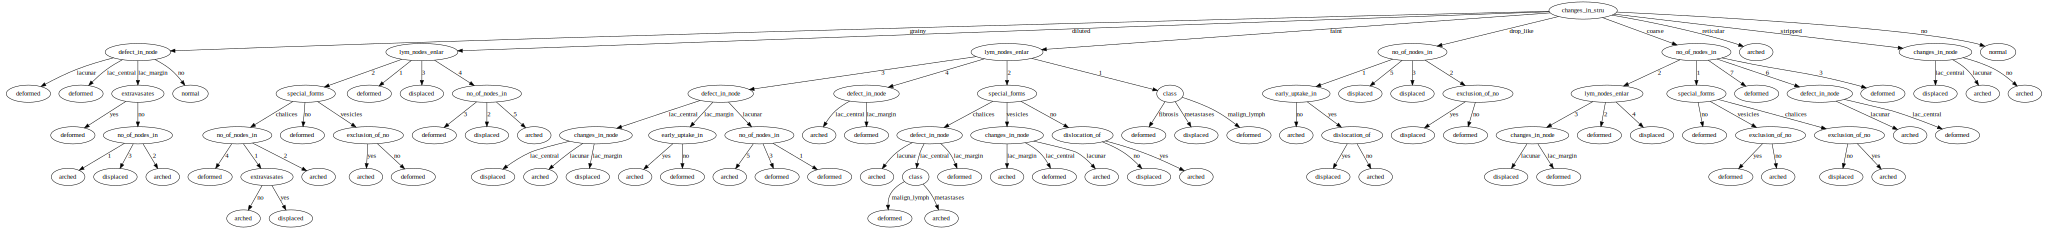

In [242]:
d.getGraph()

In [243]:
print(d.tree.no_leafs)

66


In [244]:
d.get_rules()

['changes_in_stru ->  ( grainy ) defect_in_node ->  ( lacunar ) deformed',
 'changes_in_stru ->  ( grainy ) defect_in_node ->  ( lac_central ) deformed',
 'changes_in_stru ->  ( grainy ) defect_in_node ->  ( lac_margin ) extravasates ->  ( yes ) deformed',
 'changes_in_stru ->  ( grainy ) defect_in_node ->  ( lac_margin ) extravasates ->  ( no ) no_of_nodes_in ->  ( 1 ) arched',
 'changes_in_stru ->  ( grainy ) defect_in_node ->  ( lac_margin ) extravasates ->  ( no ) no_of_nodes_in ->  ( 3 ) displaced',
 'changes_in_stru ->  ( grainy ) defect_in_node ->  ( lac_margin ) extravasates ->  ( no ) no_of_nodes_in ->  ( 2 ) arched',
 'changes_in_stru ->  ( grainy ) defect_in_node ->  ( no ) normal',
 'changes_in_stru ->  ( diluted ) lym_nodes_enlar ->  ( 2 ) special_forms ->  ( chalices ) no_of_nodes_in ->  ( 4 ) deformed',
 'changes_in_stru ->  ( diluted ) lym_nodes_enlar ->  ( 2 ) special_forms ->  ( chalices ) no_of_nodes_in ->  ( 1 ) extravasates ->  ( no ) arched',
 'changes_in_stru -> 

In [245]:
inp=[]
n=1000
n=n if n < len(test_df) else len(test_df)
for i in range(n):
  inp.append(test_df.iloc[i].to_dict())
print(d.predict(inp))


['deformed', 'deformed', 'arched', 'displaced', 'arched', 'arched', 'deformed', 'arched', 'arched', 'arched', 'normal', 'deformed', 'deformed', 'deformed', 'displaced', 'arched', 'deformed', 'arched', 'arched', 'displaced', 'deformed', 'arched', 'deformed', 'displaced', 'arched', 'Not valid instance, path: changes_in_stru ( coarse ) -> no_of_nodes_in ( 4 ) -> ', 'deformed', 'arched', 'deformed', 'displaced', 'deformed', 'arched', 'arched', 'deformed', 'deformed', 'arched', 'deformed', 'arched', 'arched', 'displaced', 'normal', 'displaced', 'displaced', 'deformed']


In [246]:
d.tree.printt()

| changes_in_stru
|----- ( grainy) defect_in_node
|---------- ( lacunar) deformed
|---------- ( lac_central) deformed
|---------- ( lac_margin) extravasates
|--------------- ( yes) deformed
|--------------- ( no) no_of_nodes_in
|-------------------- ( 1) arched
|-------------------- ( 3) displaced
|-------------------- ( 2) arched
|---------- ( no) normal
|----- ( diluted) lym_nodes_enlar
|---------- ( 2) special_forms
|--------------- ( chalices) no_of_nodes_in7
|-------------------- ( 4) deformed
|-------------------- ( 1) extravasates9
|------------------------- ( no) arched
|------------------------- ( yes) displaced
|-------------------- ( 2) arched
|--------------- ( no) deformed
|--------------- ( vesicles) exclusion_of_no
|-------------------- ( yes) arched
|-------------------- ( no) deformed
|---------- ( 1) deformed
|---------- ( 3) displaced
|---------- ( 4) no_of_nodes_in18
|--------------- ( 3) deformed
|--------------- ( 2) displaced
|--------------- ( 5) arched
|----- (

In [247]:
o=list(enumerate(d.predict(data)))
o

[(0, 'arched'),
 (1, 'displaced'),
 (2, 'deformed'),
 (3, 'arched'),
 (4, 'arched'),
 (5, 'arched'),
 (6, 'deformed'),
 (7, 'deformed'),
 (8, 'arched'),
 (9, 'displaced'),
 (10, 'arched'),
 (11, 'displaced'),
 (12, 'deformed'),
 (13, 'deformed'),
 (14, 'deformed'),
 (15, 'displaced'),
 (16, 'displaced'),
 (17, 'arched'),
 (18, 'arched'),
 (19, 'deformed'),
 (20,
  'Not valid instance, path: changes_in_stru ( coarse ) -> no_of_nodes_in ( 5 ) -> '),
 (21, 'arched'),
 (22, 'deformed'),
 (23, 'displaced'),
 (24,
  'Not valid instance, path: changes_in_stru ( coarse ) -> no_of_nodes_in ( 5 ) -> '),
 (25, 'arched'),
 (26, 'arched'),
 (27, 'arched'),
 (28, 'displaced'),
 (29, 'deformed'),
 (30, 'arched'),
 (31, 'displaced'),
 (32, 'displaced'),
 (33, 'deformed'),
 (34, 'arched'),
 (35, 'deformed'),
 (36,
  'Not valid instance, path: changes_in_stru ( coarse ) -> no_of_nodes_in ( 4 ) -> '),
 (37, 'arched'),
 (38, 'arched'),
 (39, 'arched'),
 (40, 'arched'),
 (41, 'arched'),
 (42, 'arched'),
 (

In [248]:
data[target_name]

0         arched
1      displaced
2       deformed
3         arched
4         arched
         ...    
143    displaced
144     deformed
145     deformed
146     deformed
147       arched
Name: lymphatics, Length: 148, dtype: object

In [249]:
count=0
for i in o:
  if i[1]=='Not valid instance':
    print("Something went wrong")
    count+=1
print(count)

0


In [250]:
print(df.iloc[0].to_dict())
d.predict(df.iloc[0].to_dict(),trace=True)

{'lymphatics': 'deformed', 'block_of_affere': 'no', 'bl_of_lymph_c': 'no', 'bl_of_lymph_s': 'no', 'by_pass': 'no', 'extravasates': 'no', 'regeneration_of': 'no', 'early_uptake_in': 'yes', 'lym_nodes_dimin': 1, 'lym_nodes_enlar': 2, 'changes_in_lym': 'oval', 'defect_in_node': 'lacunar', 'changes_in_node': 'lac_margin', 'changes_in_stru': 'grainy', 'special_forms': 'no', 'dislocation_of': 'yes', 'exclusion_of_no': 'yes', 'no_of_nodes_in': 1, 'class': 'metastases'}
changes_in_stru ( grainy ) -> defect_in_node ( lacunar ) -> deformed


'deformed'